In [1]:
from visualization import draw
from IPython.display import HTML
from tqdm.notebook import tqdm

In [2]:
from agent import Agent
from high_level_policy import HCBS
from map_handler import Map, read_map, read_tasks
from node import GridNode
from low_level_policy import manhattan_distance
from tests import test, movingai_test

In [3]:
height = 15
width = 30
mapstr = '''
# . . # 
. . . .  
. . . . 
# . . # 
'''
agent1 = Agent(0, 1, 3, 2)
agent2 = Agent(1, 0, 2, 3)

# Sanity check of CBS

Solution was found, cost =  9


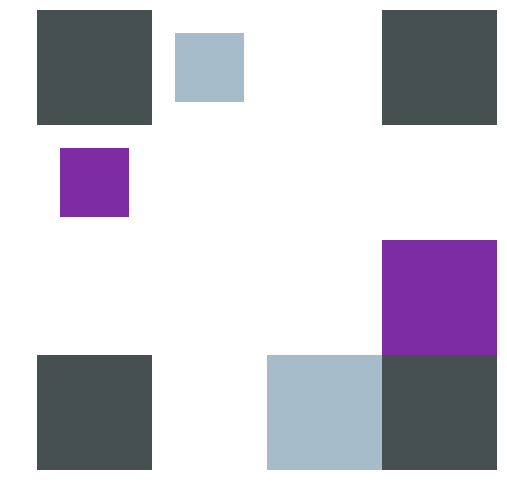

In [4]:
solution, anim = test(HCBS, 4, 4, mapstr, [agent1, agent2], heuristic_function=manhattan_distance, use_pc=False, draw_anim=True)
HTML(anim.to_html5_video())

# Sanity check of CBS + PC

Solution was found, cost =  9


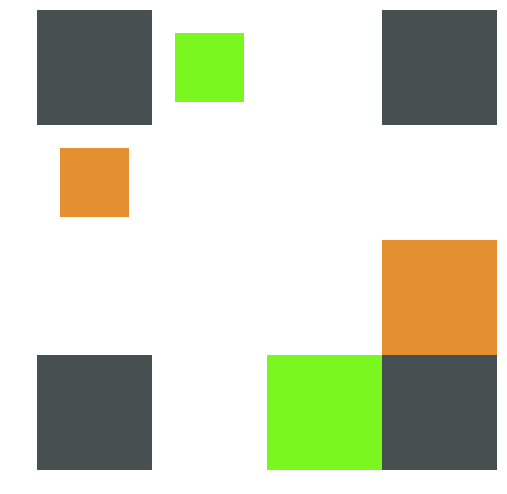

In [5]:
solution, anim = test(HCBS, 4, 4, mapstr, [agent1, agent2], heuristic_function=manhattan_distance, use_pc=True, draw_anim=True)
HTML(anim.to_html5_video())

# MovingAI demonstration

Solution was found, cost =  459


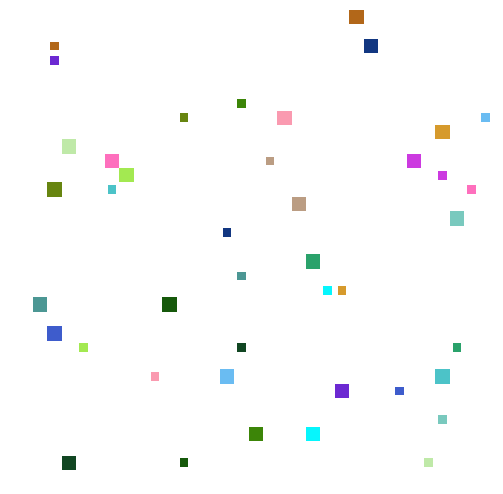

In [12]:
solution, anim = movingai_test(map_file='demo/empty-32-32.map', task_file='demo/empty-32-32-random-1.scen', n_agents=21, draw_anim = True, rseed=42, SearchFunction=HCBS, heuristic_function=manhattan_distance)
HTML(anim.to_html5_video())

Solution was found, cost =  203


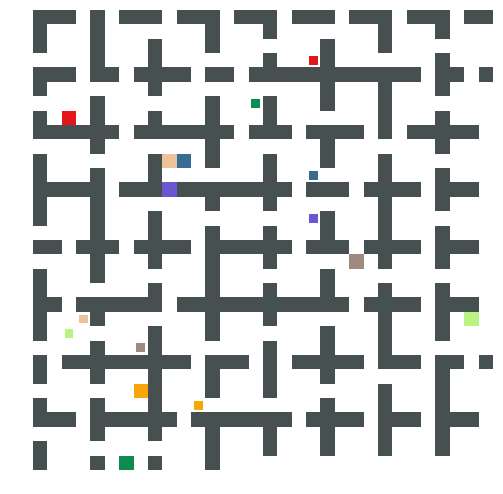

In [13]:
solution, anim = movingai_test(map_file='demo/room-32-32-4.map', task_file='demo/room-32-32-4-random-1.scen', n_agents=8, draw_anim = True, rseed=42, use_pc=True, SearchFunction=HCBS, heuristic_function=manhattan_distance)
HTML(anim.to_html5_video())